In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot
import awkward as ak

In [8]:
data_path = "/disk/atlas3/data_MC/ATLASOpen/jets/part1.root:JetRecoTree" 
keys = ["EventNumber", "EventWeight", "Clusters*", "TruthJets_R10*"]

In [32]:
#Open file in with-function will close it when you exit
def get_branches(rootfile:str, keys):
    with uproot.open(rootfile) as file:
        print(file.keys())
        events = file.arrays(filter_name=keys, library="ak", how="zip")
        return events

data = get_branches(data_path, keys)

['EventNumber', 'RunNumber', 'EventWeight', 'mu_average', 'mu_actual', 'NPV', 'Tracks_pt', 'Tracks_eta', 'Tracks_phi', 'Tracks_m', 'Tracks_vtx', 'Clusters_pt', 'Clusters_eta', 'Clusters_phi', 'Clusters_m', 'Particles_pt', 'Particles_eta', 'Particles_phi', 'Particles_m', 'Particles_pdgID', 'RecoJets_R4_pt', 'RecoJets_R4_eta', 'RecoJets_R4_phi', 'RecoJets_R4_m', 'RecoJets_R4_jvf', 'TrackJets_R4_pt', 'TrackJets_R4_eta', 'TrackJets_R4_phi', 'TrackJets_R4_m', 'RecoJets_R10_pt', 'RecoJets_R10_eta', 'RecoJets_R10_phi', 'RecoJets_R10_m', 'RecoJets_R10_D2beta1', 'RecoJets_R10_tau32wta', 'RecoJets_R10_Trimmed_pt', 'RecoJets_R10_Trimmed_eta', 'RecoJets_R10_Trimmed_phi', 'RecoJets_R10_Trimmed_m', 'RecoJets_R10_Trimmed_D2beta1', 'RecoJets_R10_Trimmed_tau32wta', 'TruthJets_R4_pt', 'TruthJets_R4_eta', 'TruthJets_R4_phi', 'TruthJets_R4_m', 'TruthJets_R10_pt', 'TruthJets_R10_eta', 'TruthJets_R10_phi', 'TruthJets_R10_m', 'TruthJets_R10_D2beta1', 'TruthJets_R10_tau32wta', 'TruthJets_R10_Trimmed_pt', 'Tru

In [38]:
data["n_jets"] = ak.num(data["TruthJets_R10"])

In [92]:
jets = [data[data.n_jets == i] for i in range(4)]
max_len = max([len(jet) for jet in jets])
first_pt = [jet.Clusters.pt[:,0] for jet in jets]
first_pt = ak.pad_none(first_pt, max_len, axis=1)
print([len(jet) for jet in first_pt])

[53127, 53127, 53127, 53127]


In [93]:
keys = [f"jet{i}_first_pt" for i in range(4)]

df = pd.DataFrame(data = dict(zip(keys, first_pt)))

ValueError: ak.to_numpy cannot convert 'None' values to np.ma.MaskedArray unless the 'allow_missing' parameter is set to True

(https://github.com/scikit-hep/awkward-1.0/blob/1.7.0/src/awkward/operations/convert.py#L316)

Text(0.5, 1.0, 'pt')

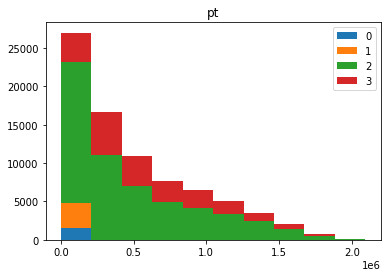

In [67]:
plt.hist([ak.max(jet0.Clusters.pt, axis=0), jet1.Clusters.pt[:,0], jet2.Clusters.pt[:,0], jet3.Clusters.pt[:,0]], stacked=True)
plt.legend(["0", "1", "2", "3"])
plt.title("pt")


Text(0.5, 1.0, 'pt')

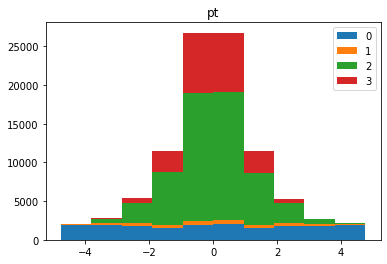

In [66]:
plt.hist([jet0.Clusters.eta[:,0], jet1.Clusters.eta[:,0], jet2.Clusters.eta[:,0], jet3.Clusters.eta[:,0]], stacked=True)
plt.legend(["0", "1", "2", "3"])
plt.title("pt")
